In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#과제 001  

Text(0, 0.5, '$y=x^4-3x^3+2$')

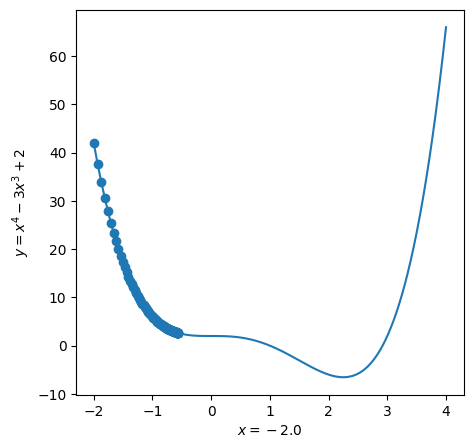

In [3]:
def f(x):
  return x**4 - 3*x**3 +2

def f_prime(x):
  h = 0.001
  return (f(x+h)-f(x)) / h

def f_prime2(x):
  return 4*x**3 - 9*x**2

all_x = tf.linspace(-2,4,1000)
all_y = f(all_x)

x = tf.Variable(-2.) # initial value
LR = 0.001

x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step = LR*f_prime(x)

  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step)  # x = x - lr*dx

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(all_x, all_y)
ax.scatter(x_history, y_history)
plt.xlabel('$x=-2.0$')
plt.ylabel('$y=x^4-3x^3+2$')

Text(0, 0.5, '$y=x^4-3x^3+2$')

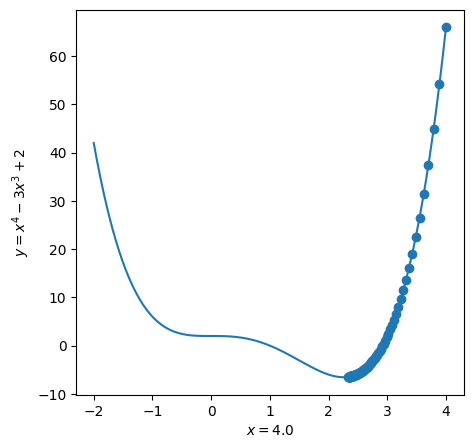

In [4]:
def f(x):
  return x**4 - 3*x**3 +2

def f_prime(x):
  h = 0.001
  return (f(x+h)-f(x)) / h

def f_prime2(x):
  return 4*x**3 - 9*x**2

all_x = tf.linspace(-2,4,1000)
all_y = f(all_x)

x = tf.Variable(4.) # initial value
LR = 0.001

x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step = LR*f_prime(x)

  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step)  # x = x - lr*dx

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(all_x, all_y)
ax.scatter(x_history, y_history)
plt.xlabel('$x=4.0$')
plt.ylabel('$y=x^4-3x^3+2$')

#과제 002

In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
w = tf.Variable(tf.random.normal(shape=(x.shape[1],1)))
b = tf.Variable(tf.random.normal([]))

loss_list = []

tf_MSE = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

for epoch in range(100):
  dataset_train = dataset.shuffle(buffer_size=1024).batch(batch_size)
  for step, (x_batch, y_batch) in enumerate(dataset_train):

    with tf.GradientTape() as tape:
      y_hat = x @ w + b
      loss = tf_MSE(y_hat, y)

    dw, db = tape.gradient(loss, [w, b])
    optimizer.apply_gradients([[dw, w], [db, b]])
    loss/=batch_size
    loss_list.append(loss.numpy())

  if not epoch%10:
    print("epoch={}: loss={:>8.4f}".format(epoch, loss.numpy()))

print("loss={:>8.4f}".format(loss.numpy()))

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(loss_list)
ax.set(xlabel="epochs", ylabel="loss")


print("loss={:>8.4f}".format(tf.reduce_mean(tf_MSE(x@w+b, y))))

IndexError: tuple index out of range